# K-Means Clustering - Cars Dataset

This notebook demonstrates the application of the **K-Means clustering algorithm** on a dataset of cars. K-Means is an unsupervised machine learning algorithm used to partition data into `k` distinct clusters based on feature similarity.

We'll explore the dataset, preprocess it, and then apply K-Means to identify natural groupings in the data.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#importing all the libraries

In [3]:
uploaded = files.upload()

Saving cars_data.csv to cars_data.csv


In [4]:
df = pd.read_csv('cars_data.csv')

In [5]:
print(df)

               model  year    price transmission  mileage fuelType  tax   mpg  \
0                I10  2017   7495.0       Manual    11630   Petrol  145  60.1   
1               Polo  2017  10989.0       Manual     9200   Petrol  145  58.9   
2           2 Series  2019  27990.0    Semi-Auto     1614   Diesel  145  49.6   
3       Yeti Outdoor  2017  12495.0       Manual    30960   Diesel  150  62.8   
4             Fiesta  2017   7999.0       Manual    19353   Petrol  125  54.3   
...              ...   ...      ...          ...      ...      ...  ...   ...   
97707         Fiesta  2017  10447.0    Automatic     8337   Petrol  145  54.3   
97708       3 Series  2014  14995.0       Manual    25372   Diesel   30  61.4   
97709         Fiesta  2017   8950.0       Manual    19910   Petrol  125  54.3   
97710          Astra  2017  10700.0    Automatic    24468   Petrol  125  50.4   
97711    Grandland X  2019  15798.0       Manual    10586   Diesel  150  48.7   

       engineSize Manufactu

In [6]:
df = df.drop(['model', 'Manufacturer'], axis=1)
#droping model caz of Its data type being char and hard to change

In [7]:
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])
#changing the value from char to int

In [8]:
df = df.dropna()
#droping rows which doesnot have any value

In [9]:
df = df.select_dtypes(include=[float, int])
#seeing all the the values are in the form for float & int

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
#using k range

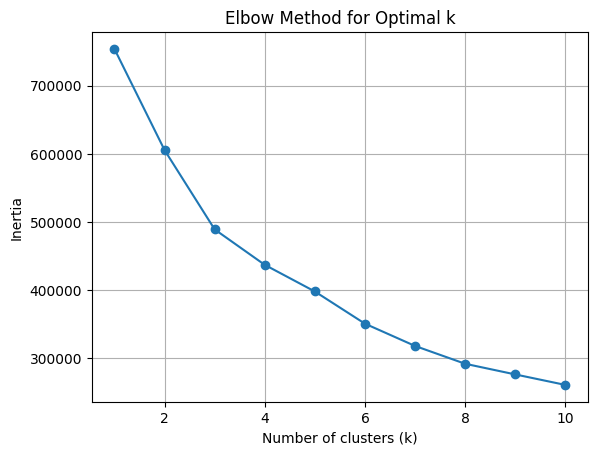

In [13]:
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
#ploting the values

In [20]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

In [21]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

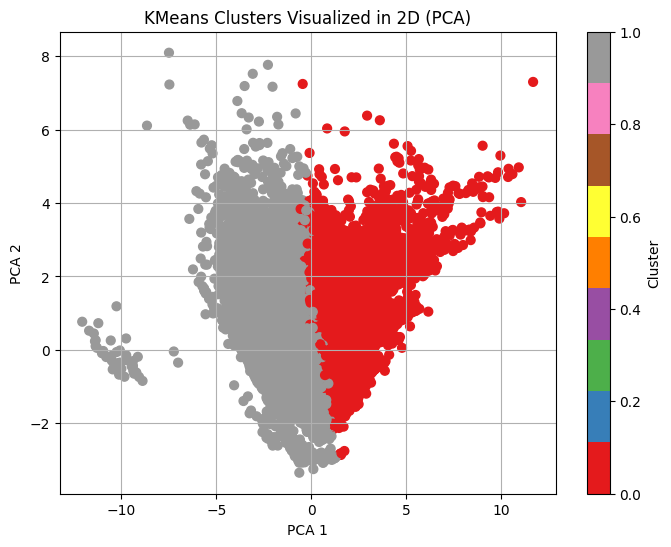

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set1', s=40)
plt.title("KMeans Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

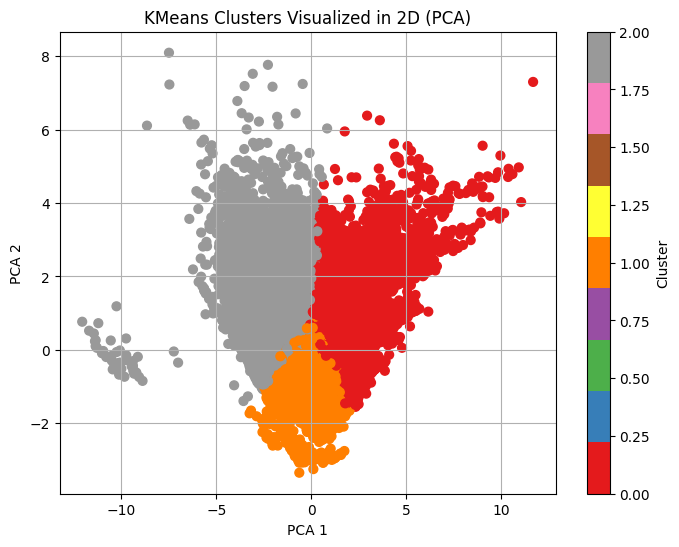

In [33]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set1', s=40)
plt.title("KMeans Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

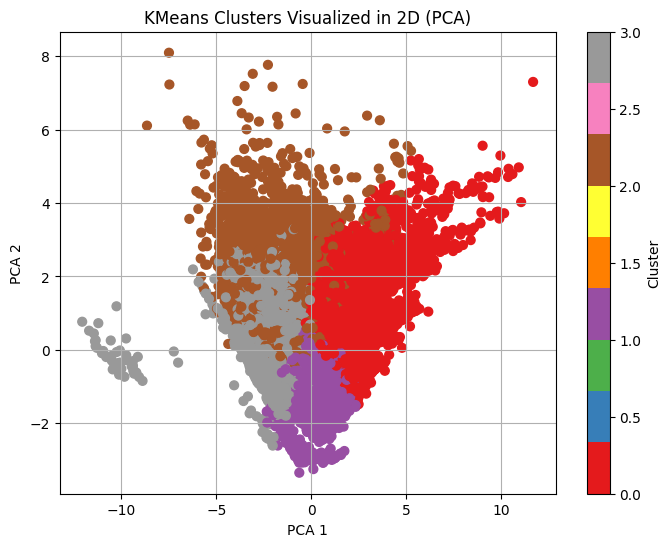

In [27]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set1', s=40)
plt.title("KMeans Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

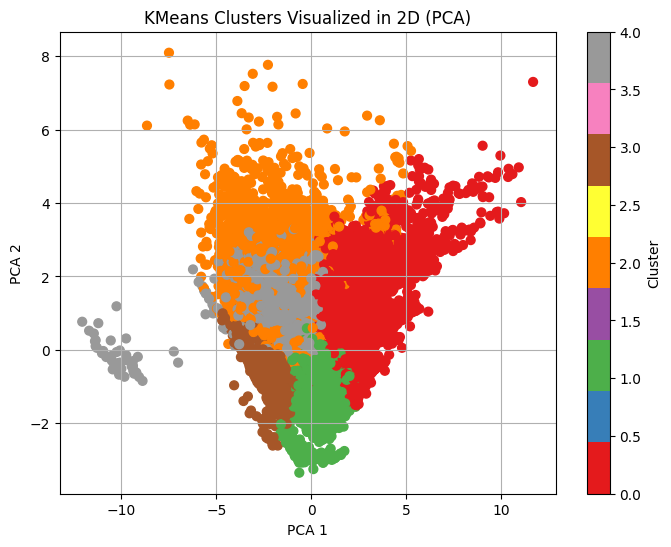

In [28]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set1', s=40)
plt.title("KMeans Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

As we can See after using more than 3 cluster they are overlaping which significies not so good k- clusture

In [34]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#splitting the data into training and testing sets.

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#predictions using the trained KNN model on the test data and then evaluate the accuracy of those predictions


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77      5452
           1       0.76      0.79      0.78      8389
           2       0.79      0.71      0.75      5011

    accuracy                           0.77     18852
   macro avg       0.77      0.76      0.77     18852
weighted avg       0.77      0.77      0.77     18852



-Overall Accuracy is 77%--
---model is doing GOOD with balanced performance across all clusters.---
---Cluster 1 has the highest recall.----
---Cluster 2 has the best precision, but lower recall.---
----Overall, F1-scores are around 0.75–0.78, which is good.---

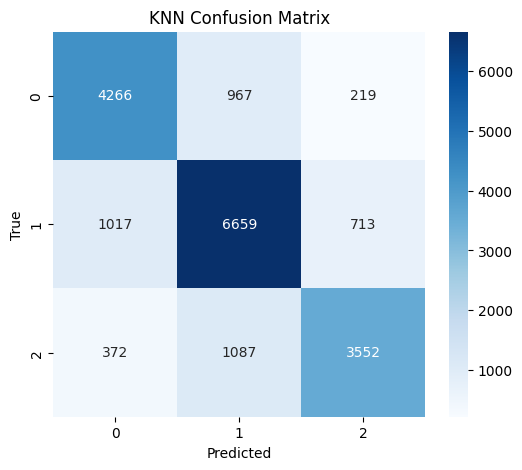

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Model best prediction class is 1

In [40]:
new_car = [[2020, 20000, 0, 30000, 1, 150, 55, 1.6]]
new_car_scaled = scaler.transform(new_car)
predicted_cluster = knn.predict(new_car_scaled)
print(f"\nPredicted Cluster for New Car: {predicted_cluster[0]}")
# pridecting cluster for a new car


Predicted Cluster for New Car: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [41]:
print(X.columns)

Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')


In [42]:
#new_car_dict = {
#    'year': [2020],
 #   'price': [20000],
  #  'transmission': [0],
   # 'mileage': [30000],
    #'fuelType': [1],
    #'tax': [150],
    #'mpg': [55],
   # 'engineSize': [1.6],

#}

In [58]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [59]:
y_pred = knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      5452
           1       0.77      0.79      0.78      8389
           2       0.81      0.68      0.74      5011

    accuracy                           0.77     18852
   macro avg       0.77      0.76      0.76     18852
weighted avg       0.77      0.77      0.77     18852



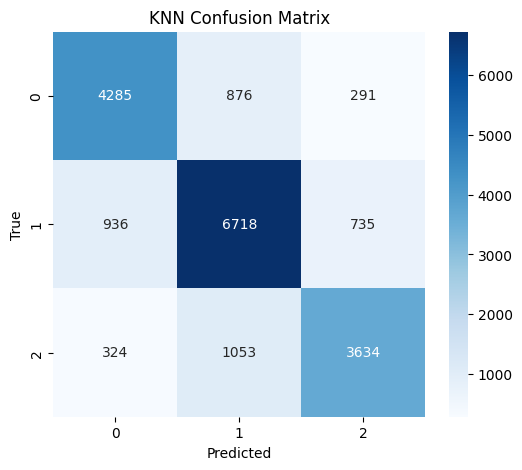

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Conclusion

K-Means clustering effectively grouped similar cars based on features such as mileage, horsepower, and other relevant attributes. Visualizing these clusters can help in understanding the natural structure of data and identifying meaningful patterns.
